In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers.core import Activation
from keras.layers import Concatenate,MaxPool2D
from keras.optimizers import Adam
import os
import cv2
import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import f1_score
import sklearn
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [ ]:
CLASSES = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']
target_dict={k: v for v, k in enumerate(CLASSES)}
target_dict
target_val=  [target_dict[CLASSES[i]] for i in range(len(CLASSES))]

In [ ]:
my_generator= ImageDataGenerator(rescale=1./255, validation_split=0.2) #rescaled the images
my_image_generator_train = my_generator.flow_from_directory('/content/drive/MyDrive/Data/train', #this is the image generator next we need to read the data from it
        target_size=(150, 150),
        batch_size=32,
        class_mode='sparse',
        subset="training") #does not fully load the data into the memory instead it created a channel  
validation_image_generator= my_generator.flow_from_directory('/content/drive/MyDrive/Data/train',
        target_size=(150, 150),
        batch_size=32,
        subset="validation",
        class_mode='sparse' )
test = my_generator.flow_from_directory(
        directory='/content/drive/MyDrive/Data/test',
        target_size=(150, 150),
        class_mode='sparse')

Found 10243 images belonging to 104 classes.
Found 2510 images belonging to 104 classes.
Found 3712 images belonging to 104 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Flatten())
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(units=104,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 32)                5607456   
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

In [ ]:
opti=Adam(0.0001)
model.compile(optimizer=opti,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

#checkpoint = ModelCheckpoint("f/content/drive/MyDrive/CNN_1.h5", monitor='loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=1, mode='auto')

hist = model.fit(my_image_generator_train , validation_data= validation_image_generator, epochs=20, callbacks=early)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


321/321 [==============================] - 1785s 6s/step - loss: 4.5331 - accuracy: 0.0356 - val_loss: 4.4229 - val_accuracy: 0.0474
Epoch 2/20
321/321 [==============================] - 47s 146ms/step - loss: 4.4111 - accuracy: 0.0505 - val_loss: 4.3068 - val_accuracy: 0.0865
Epoch 3/20
321/321 [==============================] - 46s 145ms/step - loss: 4.2996 - accuracy: 0.0589 - val_loss: 4.1847 - val_accuracy: 0.0849
Epoch 4/20
321/321 [==============================] - 46s 145ms/step - loss: 4.2241 - accuracy: 0.0618 - val_loss: 4.1175 - val_accuracy: 0.0845
Epoch 5/20
321/321 [==============================] - 45s 141ms/step - loss: 4.1608 - accuracy: 0.0637 - val_loss: 4.0636 - val_accuracy: 0.0861
Epoch 6/20
321/321 [==============================] - 47s 145ms/step - loss: 4.0979 - accuracy: 0.0661 - val_loss: 4.0144 - val_accuracy: 0.0849
Epoch 7/20
321/321 [==============================] - 46s 143ms/step - loss: 4.0590 - accuracy: 0.0688 - val_loss: 3.9888 - val_accuracy: 0.08

In [ ]:
SimpleCnn= model.save('/content/drive/MyDrive/SimpleCNNBETTER')

In [ ]:
score = model.evaluate(test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.7658066749572754
Test accuracy: 0.12257543206214905


In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 32 samples")
predictions = model.predict(test)
print("predictions shape:", predictions.shape)


Generate predictions for 32 samples
116/116 [==============================] - 13s 110ms/step
predictions shape: (3712, 104)


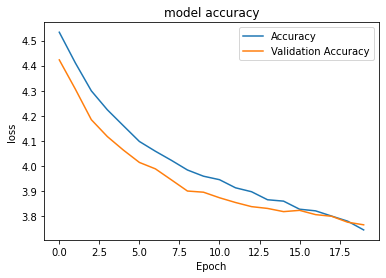

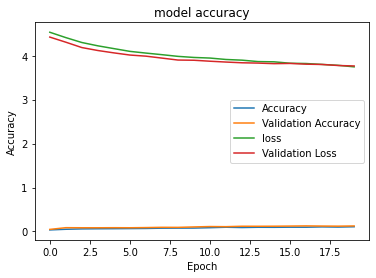

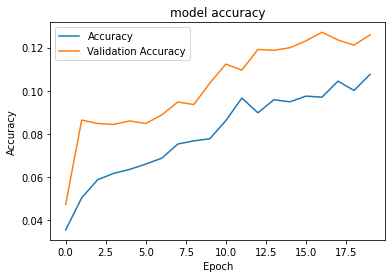

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()
####################################
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()
##############################
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

#F-Score and Confsuion MATRIX

In [ ]:
testy = my_generator.flow_from_directory(
        directory='/content/drive/MyDrive/Data/test',
        target_size=(150, 150),
        batch_size=16474,
        class_mode='sparse')


Found 3712 images belonging to 104 classes.


In [ ]:
for X_test, Y_test in testy:
   break

In [ ]:
#F-score

In [ ]:
from sklearn.metrics import f1_score
y_true=testy.classes
y_pred=predictions
y_classes=[np.argmax(CLASSES) for CLASSES in y_pred]
f1_score(y_true, y_classes, average='macro')

0.00462125308312378

In [ ]:
#Confusion Matrix